In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
loc = pd.read_csv('data/weatherww2/Weather Station Locations.csv')
data = pd.read_csv('data/weatherww2/Summary of Weather.csv')

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loc.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [4]:
loc.describe()

,WBAN,ELEV,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000
mean,33421.440994,439.850932,20.347205,8.364182
std,20826.534394,1745.422339,21.042992,87.420419
min,10001.000000,1.000000,-27.600000,-175.000000
25%,13601.000000,9.000000,8.233333,-60.850000
50%,32906.000000,27.000000,22.333333,9.083333
75%,34150.000000,98.000000,36.116667,67.250000
max,82506.000000,9999.000000,67.016667,177.366667


### Check for the null values in weather station location data

In [5]:
loc.isnull().sum()

WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

### Found no null values 

In [6]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [8]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [12]:
import missingno as msno

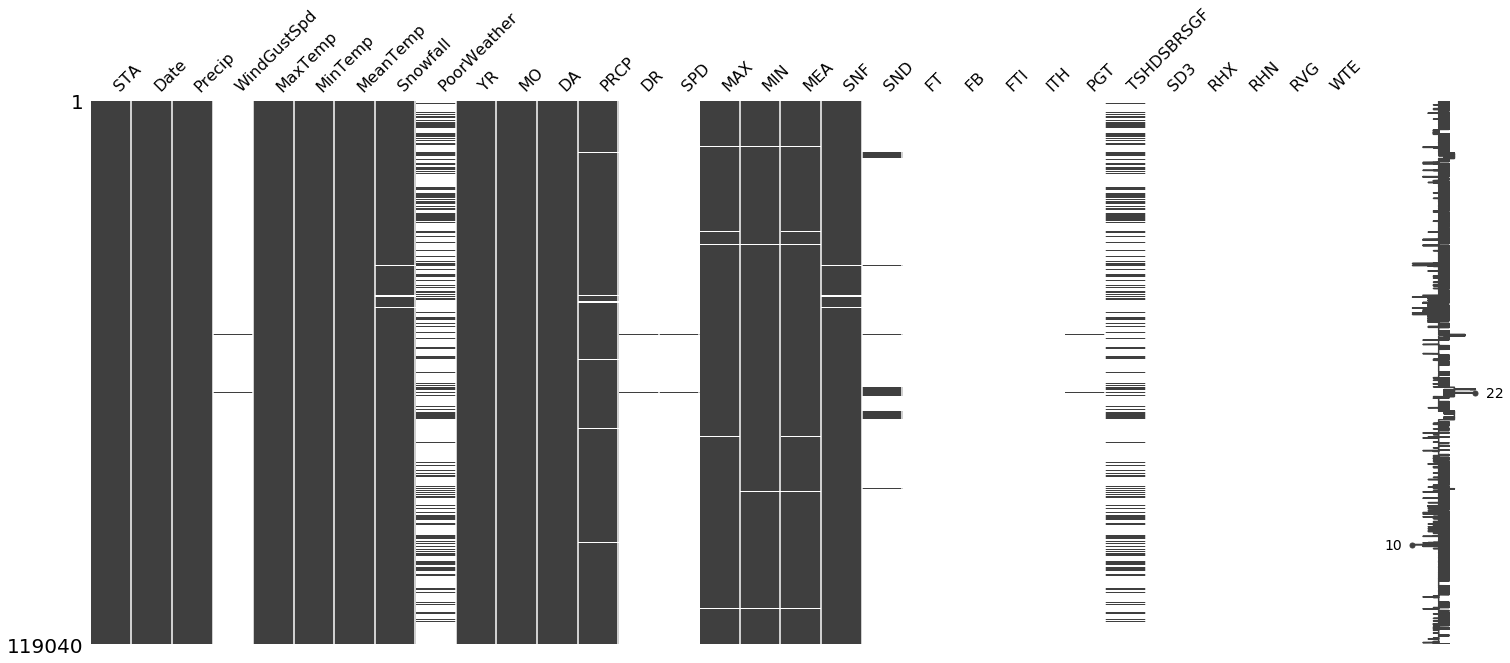

In [13]:
msno.matrix(data)

In [16]:
def nullpct(df):
    pct = (df.isnull().sum()/ df.shape[0]) * 100
    return pct

In [17]:
pctNull = nullpct(data)

In [21]:
pctNull[pctNull>20].index

Index(['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI',
       'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [24]:
nonNulCols = data.drop(pctNull[pctNull>20].index,axis=1)

In [25]:
nonNulCols.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [26]:
pctNull = nullpct(nonNulCols)

In [27]:
pctNull

STA         0.000000
Date        0.000000
Precip      0.000000
MaxTemp     0.000000
MinTemp     0.000000
MeanTemp    0.000000
Snowfall    0.976983
YR          0.000000
MO          0.000000
DA          0.000000
PRCP        1.622984
MAX         0.398185
MIN         0.393145
MEA         0.418347
SNF         0.976983
dtype: float64

In [28]:
wthrData = nonNulCols

In [35]:
wthrData.dtypes

STA                  int64
Date        datetime64[ns]
Precip              object
MaxTemp            float64
MinTemp            float64
MeanTemp           float64
Snowfall            object
YR                   int64
MO                   int64
DA                   int64
PRCP                object
MAX                float64
MIN                float64
MEA                float64
SNF                 object
dtype: object

In [32]:
wthrData.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [91]:
wthrData.Date = pd.to_datetime(wthrData.Date, format='%Y-%m-%d')

In [98]:
wthrDataCat = wthrData.select_dtypes(include=[object])

In [99]:
wthrDataCat[wthrData.SNF == 0].shape[0] / wthrData.shape[0]

0.7232022849462365

In [101]:
wthrDataCat.drop(['Precip', 'Snowfall'], axis=1, inplace=True)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
wthrDataCat.SNF.fillna(0, inplace=True)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [108]:
wthrDataCat.describe()

,PRCP,SNF
count,117108,119040.0
unique,540,42.0
top,0,0.0
freq,62335,87253.0


In [112]:
wthrDataCat = wthrDataCat.replace('T', 0)

In [116]:
wthrDataCat.PRCP = pd.to_numeric(wthrDataCat.PRCP)

In [118]:
wthrDataCat.SNF = pd.to_numeric(wthrDataCat.SNF)

In [120]:
wthrDataCat.dtypes

PRCP    float64
SNF     float64
dtype: object

In [121]:
wthrData[['PRCP','SNF']] = wthrDataCat

In [122]:
wthrData.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0,42,7,2,0.00,84.0,71.0,78.0,0.0
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.10,79.0,72.0,76.0,0.0
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.10,80.0,72.0,76.0,0.0
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0,42,7,5,0.00,80.0,71.0,76.0,0.0


In [129]:
wthrData.Date.unique()

array(['1942-07-01T00:00:00.000000000', '1942-07-02T00:00:00.000000000',
       '1942-07-03T00:00:00.000000000', ...,
       '1941-08-22T00:00:00.000000000', '1941-08-23T00:00:00.000000000',
       '1941-08-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [140]:
BCMP = sns.color_palette('husl')

In [453]:
def pltSize(rows, cols):
    f,ax = plt.subplots(rows, cols, figsize=(16,8))
    return f, ax

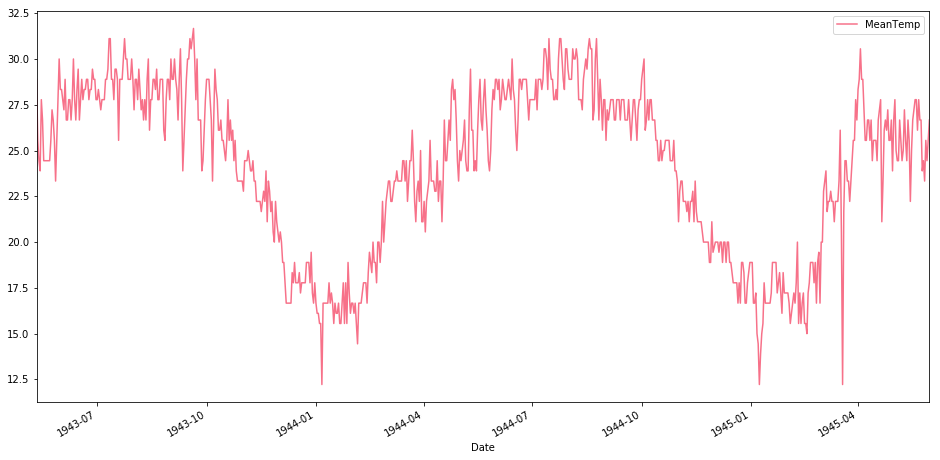

In [145]:
f, ax = pltSize(1,1)
data = wthrData.set_index('Date')

data[data['STA'] == 32907].plot(y='MeanTemp', ax=ax, color = BCMP[0])

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


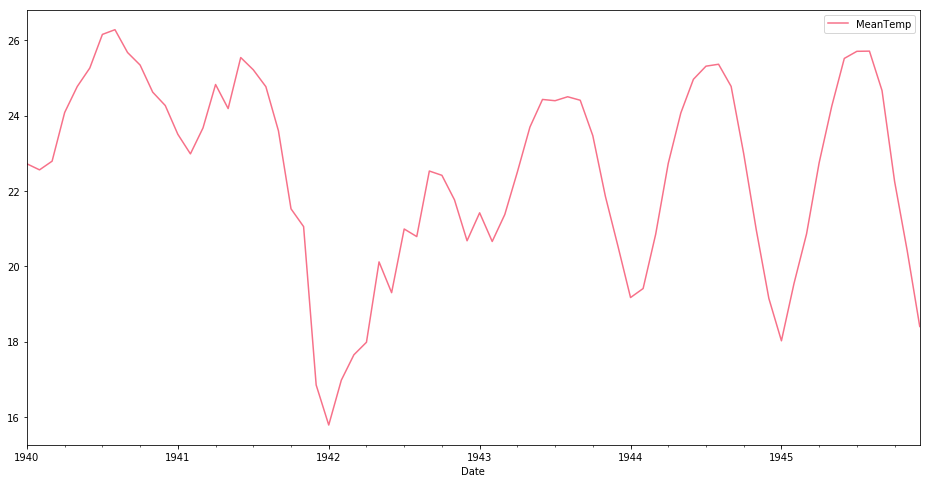

In [142]:
f, ax = pltSize(1,1)
data.resample('1M').plot(y='MeanTemp', ax=ax, color = BCMP[0])

In [149]:
sigStadata = data[data['STA'] == 32907]

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


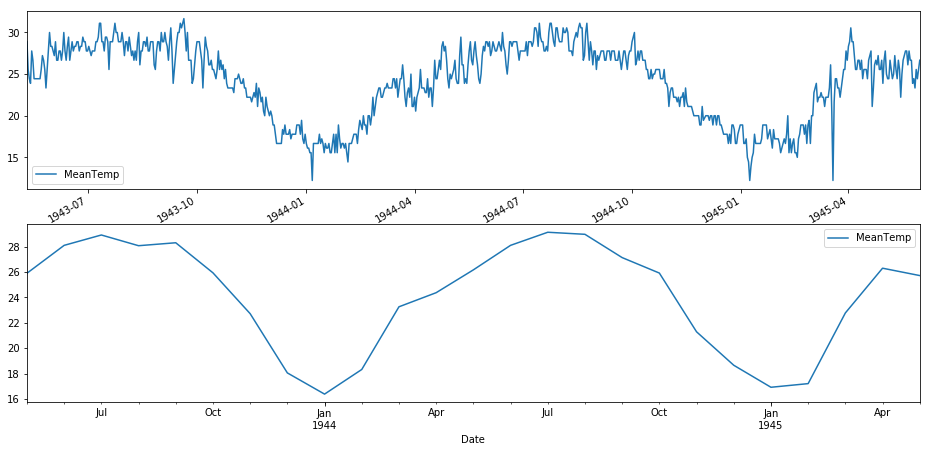

In [159]:
f, ax = pltSize(2,1)
sigStadata.plot(y='MeanTemp', ax=ax[0])
sigStadata.resample('M').plot(y='MeanTemp', ax=ax[1])

In [156]:
f, ax = pltSize(2,1)
sigStadata.plot(y='MeanTemp', ax=ax[0])
sigStadata.resample('M').plot(y='MeanTemp', ax=ax[1])

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [169]:
print(sigStadata[sigStadata.index.year ==1943].shape)
print(sigStadata[sigStadata.index.year ==1944].shape)

(235, 14)
(365, 14)


/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


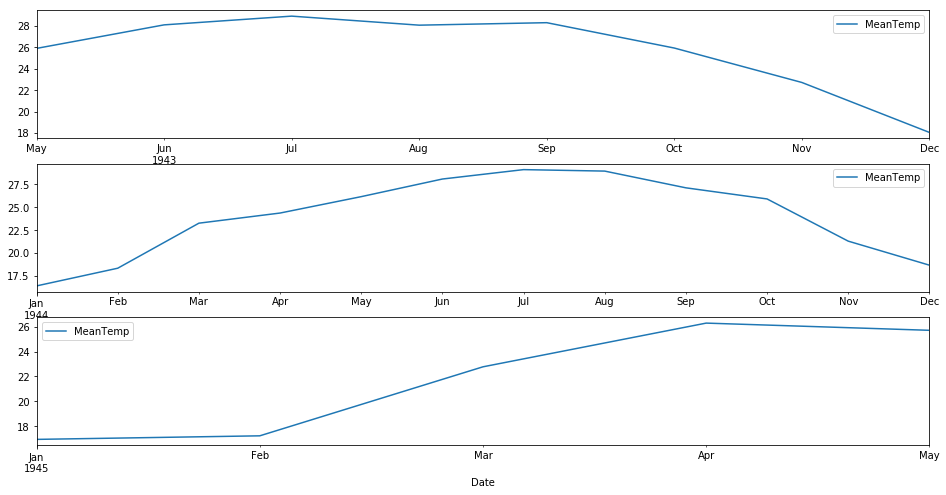

In [171]:
f, ax = pltSize(3,1)
for i,year in enumerate(sigStadata.index.year.unique()):
    sigStadata[sigStadata.index.year == year].resample('M').plot(y='MeanTemp', ax=ax[i])


### Stationarity of a Time Series

There are three basic criterion for a time series to understand whether it is stationary series or not.
Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary

constant mean

constant variance

autocovariance that does not depend on time. 
autocovariance is covariance between time series and lagged time series.

Lets visualize and check seasonality trend of our time series.

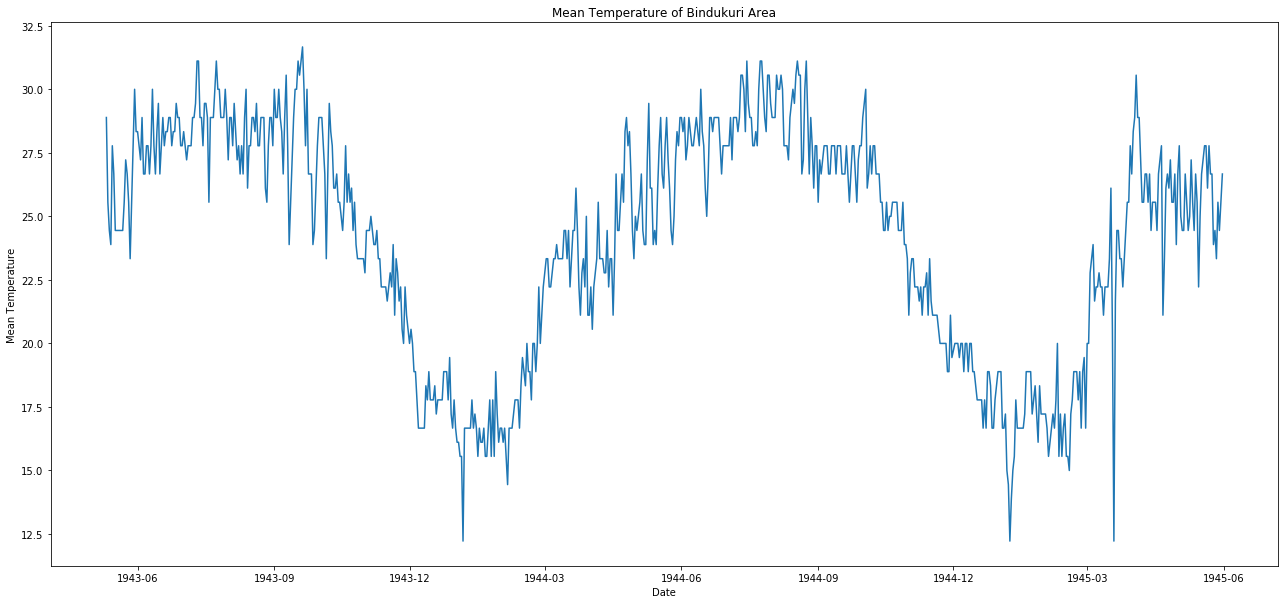

In [165]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(sigStadata.index,sigStadata.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [172]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [203]:
sigStadata['year'] = sigStadata.index.year
sigStadata['month'] = sigStadata.index.month

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [179]:
tsYearMonth = sigStadata.groupby(['year', 'month'])['MeanTemp'].mean()

In [205]:
tsYearMonth.tail()

year  month
1945  1        16.935484
      2        17.222222
      3        22.777778
      4        26.296296
      5        25.716846
Name: MeanTemp, dtype: float64

In [206]:
tsYearMonth.shape

(25,)

In [207]:
sigStadata.shape

(751, 16)

In [208]:
ts = sigStadata[['MeanTemp']]

In [210]:
ts.head()

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778


In [211]:
rollMean = pd.rolling_mean(ts,window=6)
rollStd 

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


In [212]:
rollMean.shape

(751, 1)

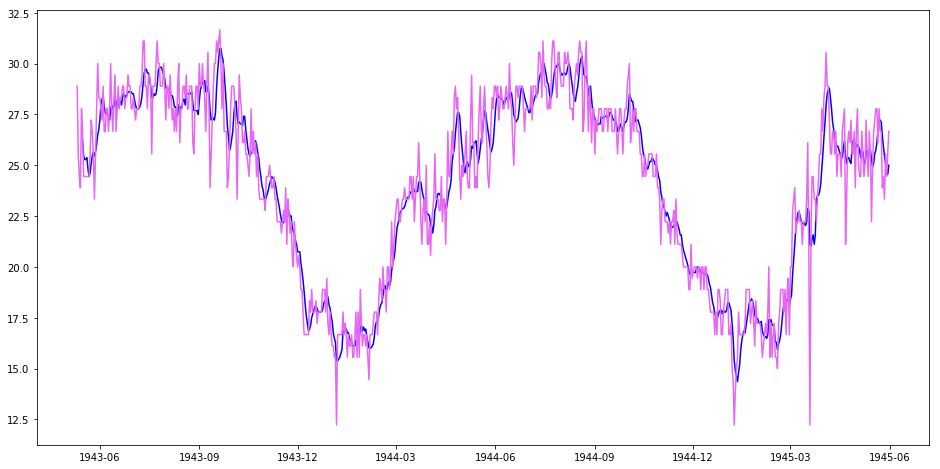

In [226]:
f, ax = pltSize(1,1)
plt.plot(rollMean, color='b')
plt.plot(ts,color = BCMP[-1], linestyle="-")

In [224]:
check_adfuller(ts.iloc[:,0].values)

Test statistic:  -1.4095966745887778
p-value:  0.5776668028526346
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  del sys.path[0]
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


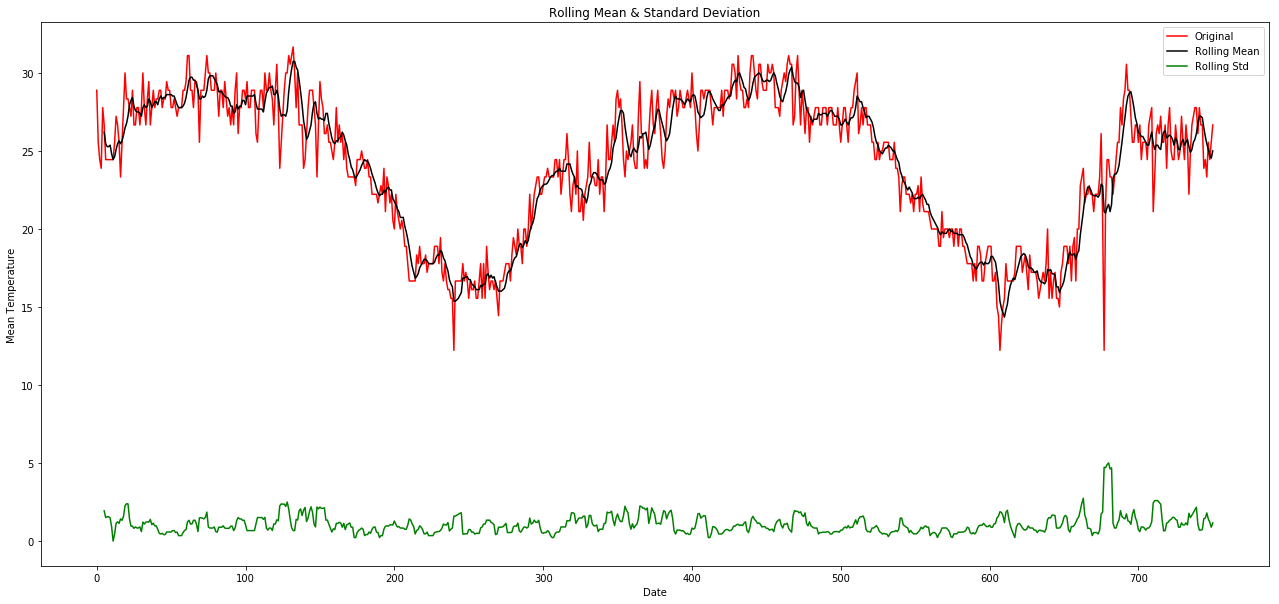

In [227]:
check_mean_std(ts.iloc[:,0].values)

The above time series is not stationary. 

The rolling mean is varing and not constant, though the deviation looks constant. 


### Make a Time Series Stationary?

As we mentioned before, there are 2 reasons behind non-stationarity of time series

Trend: varying mean over time. We need constant mean for stationary of time series.

Seasonality: variations at specific time. We need constant variations for stationary of time series.

First solve trend(constant mean) problem

Most popular method is moving average.

Moving average: We have window that take the average over the past 'n' sample. 'n' is window size.


In [258]:
ts_log = np.log(ts)
movingAvg = pd.rolling_mean(ts, window=6)
#movingAvg = np.log(movingAvg)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()
  


In [259]:
from statsfunc import pltSize, dickeyFullerTest

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  del sys.path[0]
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


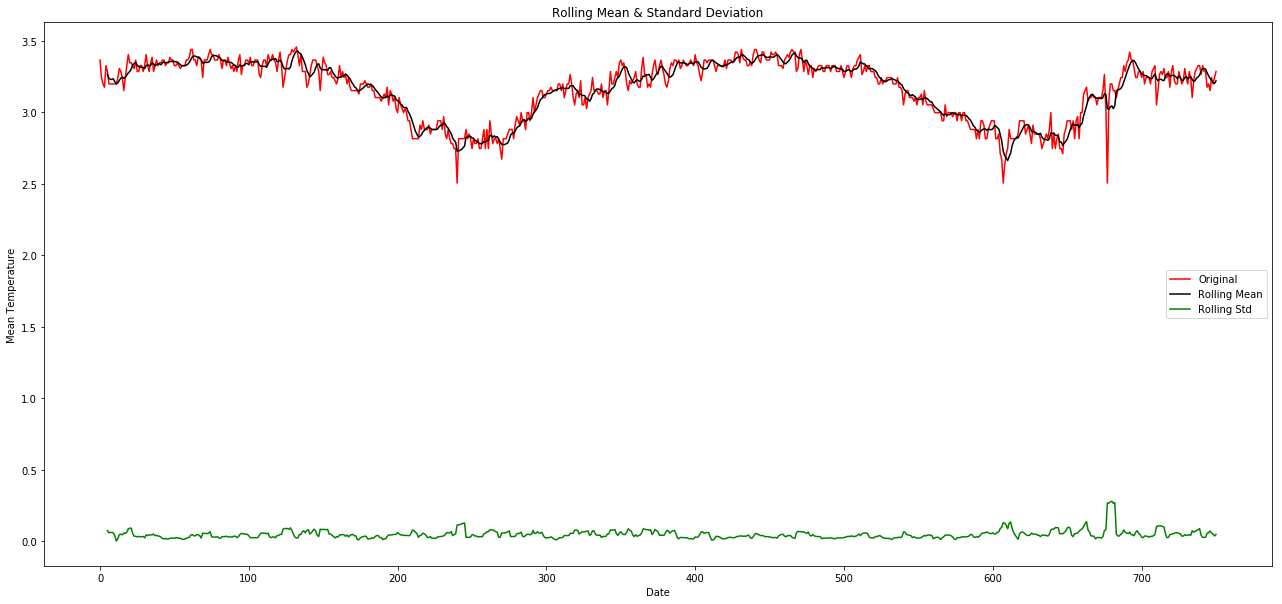

Test statistic:  -1.9663405060036054
p-value:  0.30152375810092724
Critical Values: {'1%': -3.4391580196774494, '5%': -2.8654273226340554, '10%': -2.5688400274762397}


In [260]:
#f, ax = pltSize(1,1)
check_mean_std(ts_log.iloc[:,0].values)
check_adfuller(ts_log.iloc[:,0].values)

In [262]:
moving_avg = pd.rolling_mean(ts,window=6)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()
  del sys.path[0]
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).std()
  


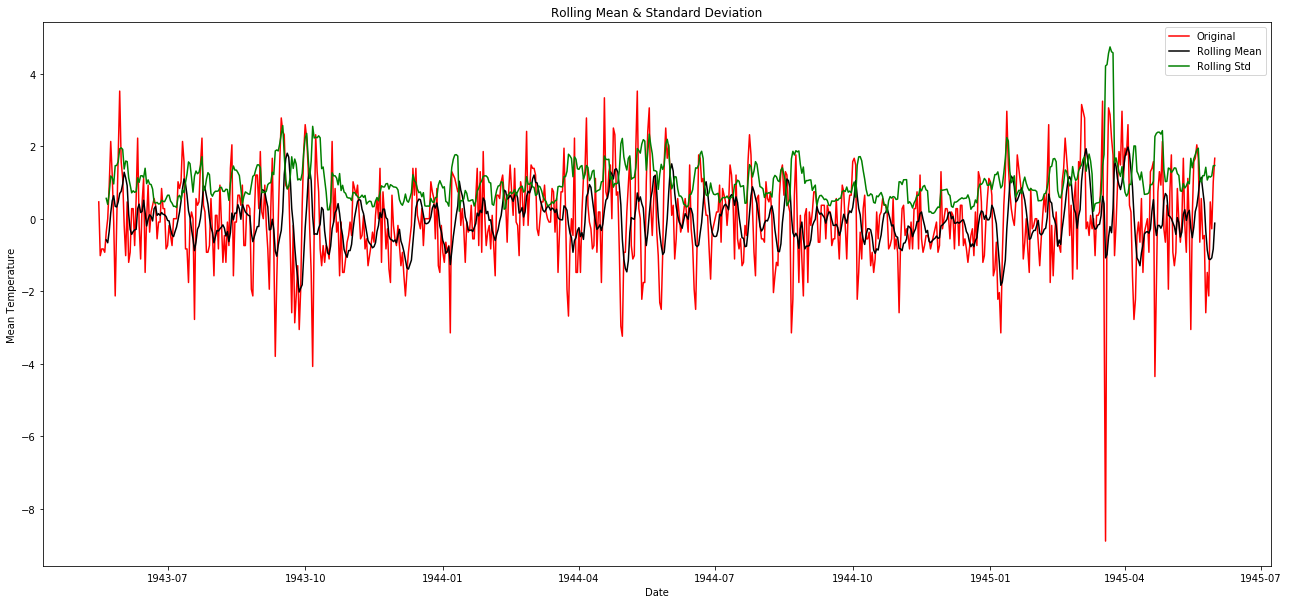

Test statistic:  -11.138514335138481
p-value:  3.150868563164471e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [263]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)

Second one is constant variance. It looks like constant. (yes stationary)

The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.

Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

In [264]:
#Perform Dickey-Fuller test:
def dickeyFullerTest(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

In [267]:
dickeyFullerTest(ts_moving_avg_diff.iloc[:,0])

Results of Dickey-Fuller Test:
Test Statistic                -1.113851e+01
p-value                        3.150869e-20
#Lags Used                     8.000000e+00
Number of Observations Used    7.370000e+02
Critical Value (1%)           -3.439254e+00
Critical Value (5%)           -2.865470e+00
Critical Value (10%)          -2.568863e+00
dtype: float64


### differencing method

In [271]:
ts_diff = ts - ts.shift()
ts_diff.shape

(751, 1)

In [272]:
ts_diff.dropna(axis=0,inplace=True)
ts_diff.shape

(750, 1)

In [273]:
dickeyFullerTest(ts_diff.iloc[:,0])

Results of Dickey-Fuller Test:
Test Statistic                -1.167896e+01
p-value                        1.760208e-21
#Lags Used                     1.000000e+01
Number of Observations Used    7.390000e+02
Critical Value (1%)           -3.439230e+00
Critical Value (5%)           -2.865459e+00
Critical Value (10%)          -2.568857e+00
dtype: float64


/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  del sys.path[0]
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


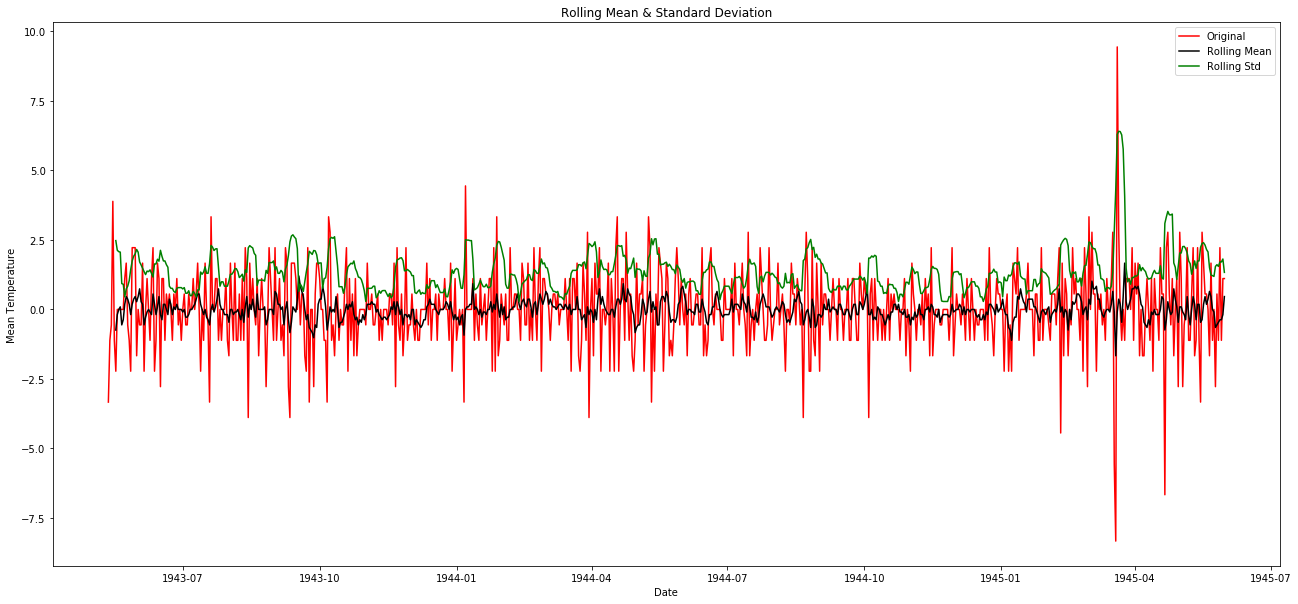

In [274]:
check_mean_std(ts_diff.iloc[:,0])


### Forecasting a Time Series

We learn two different methodsthat are moving average and differencing methods to avoid trend and seasonality problem

For prediction(forecasting) we will use ts_diff time series that is result of differencing method. 

Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.

AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use x(t-1), x(t-2) and x(t-3) to predict x(t)
I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0


MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.
(p,d,q) is parameters of ARIMA model.
In order to choose p,d,q parameters we will use two different plots.
Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.


Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.


In [275]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [277]:
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

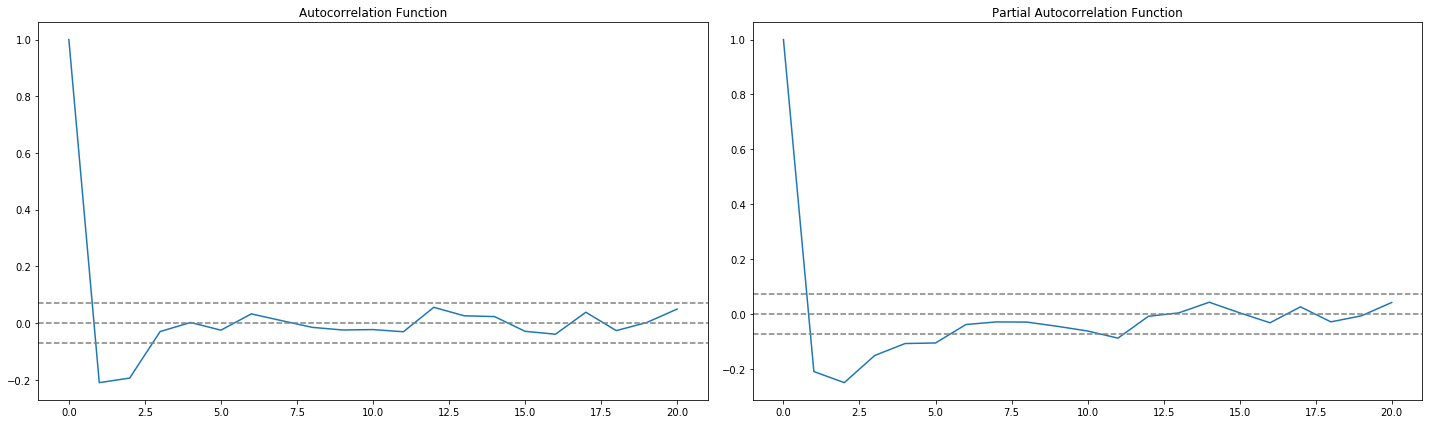

In [279]:
f,ax = plt.subplots(1,1, figsize=(20,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [1]:
f, ax = plt.subplots(1,1, figsize=(12,8))
plt.plot(ts, color=BCMP[2])
plt.plot(results_AR.fittedvalues, color='b')


NameError: name 'plt' is not defined

In [291]:
ts_train = ts[ts.index.year<1945]
ts_test = ts[ts.index.year==1945] 

print(ts_train.shape, ts_test.shape)

(600, 1) (151, 1)


In [307]:
from datetime import datetime
model = ARIMA(ts, order=(1, 0, 1))  
results_AR = model.fit(disp=0)  
start_index = datetime(1944, 12, 31)
end_index = datetime(1945, 5, 31)
forecast = results_AR.predict(start=start_index, end=end_index)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


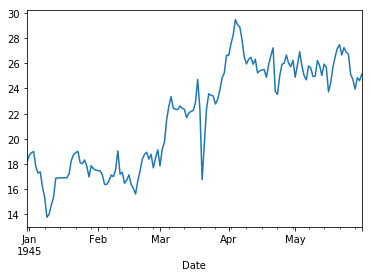

In [308]:
forecast.plot()

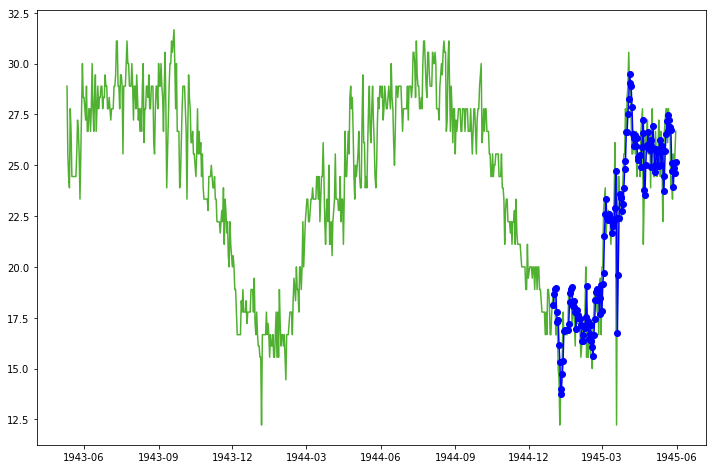

In [495]:
f, ax = plt.subplots(1,1, figsize=(12,8))
plt.plot(ts, color=BCMP[2])
plt.plot(forecast, color='b', marker='o')
#plt.plot(results_AR.fittedvalues, color=BCMP[0])

In [323]:
ts.shape

(751, 1)

In [332]:
from sklearn.metrics import mean_squared_error

In [335]:
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [347]:
forecast2 = model_fit2.predict()
error = mean_squared_error(ts.loc['1944-12-31':], forecast)
print("error: " ,error)

error:  3.15520342791317


/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [346]:
ts.loc['1944-12-31':].shape

(152, 1)

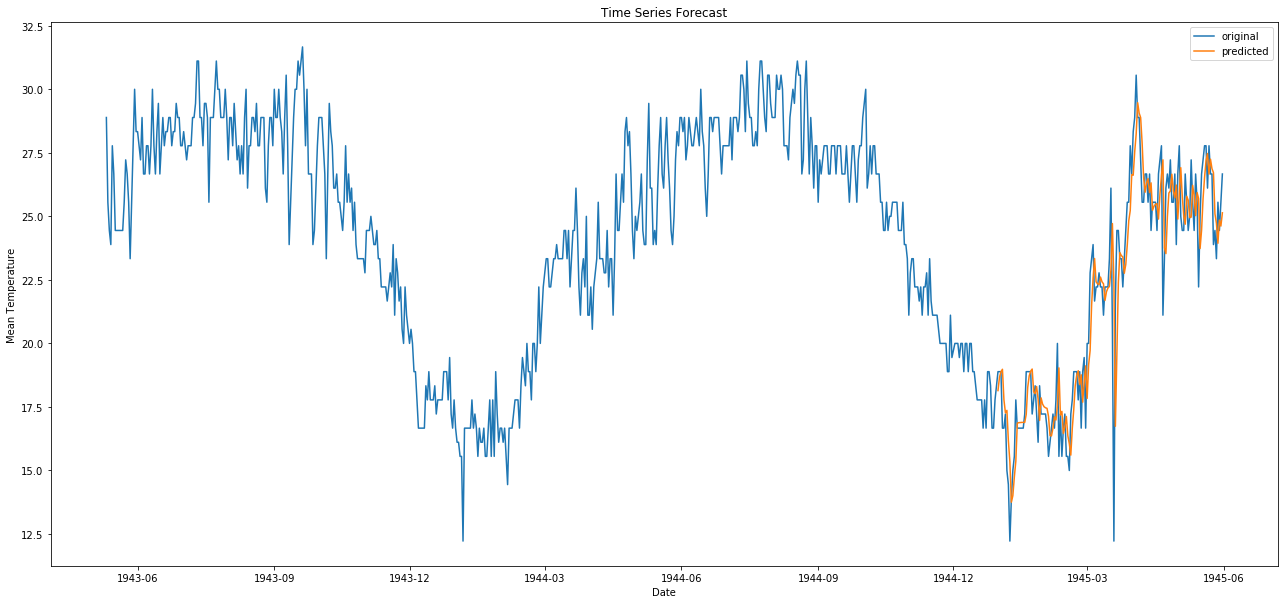

In [348]:
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()

In [340]:
ts.tail()

,MeanTemp
Date,
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444
1945-05-30,25.555556
1945-05-31,26.666667


In [373]:
modelDiff = ARIMA(ts_diff,order=(1,0,1))
fitVal = modelDiff.fit(disp=0)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [374]:

start_index = datetime(1944, 12, 31)
end_index = datetime(1945, 5, 31)
#results_AR.predict(start=start_index, end=end_index)
fitVal.fittedvalues.shape 

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(750,)

In [375]:
prediVal = fitVal.predict(start=start_index, end=end_index)
forecastAll = fitVal.predict()
forecastAll.shape
ts_diff.shape

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(750, 1)

In [376]:
print(mean_squared_error(ts_diff[start_index:],prediVal))
print(mean_squared_error(ts_diff, forecastAll))

3.000656288415546
1.7445153880142283


In [377]:
ts_moving_avg_diff.head()

,MeanTemp
Date,
1943-05-16,0.462963
1943-05-17,-1.018519
1943-05-18,-0.833333
1943-05-19,-0.833333
1943-05-20,-0.925926


In [378]:
modelAvgDiff = ARIMA(ts_moving_avg_diff,order=(1,0,1))
fitVal = modelAvgDiff.fit(disp=0)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [379]:
predVal = fitVal.predict()

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [380]:
mean_squared_error(ts_moving_avg_diff, predVal)

1.2325803090546792

In [381]:
observations = pd.read_csv('data/weatherww2/operations.csv')

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [382]:
observations.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [383]:
observations.shape

(178281, 46)

In [384]:
observations.describe()

,Mission ID,Takeoff Longitude,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,...,High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Source ID
count,178281.000000,2980.000000,169565.000000,169543.000000,120826.000000,82242.000000,125108.000000,81612.000000,133.000000,247.000000,...,146201.000000,3283.000000,356.000000,25732.000000,5768.000000,194.000000,16902.000000,2.119000e+03,166508.000000,174236.000000
mean,89414.547041,220.618627,38.067793,43.340213,139.026812,12.329771,10.218899,12.347486,2.157895,4.275304,...,23.911995,132.001965,19962.732022,21.527213,102.684560,2065.630928,12.017136,1.237718e+04,25.760326,152670.902322
std,51649.744549,454.046956,18.711405,59.681160,186.818278,12.514833,11.246399,12.573549,1.369816,5.924758,...,90.092020,498.596761,45331.714255,66.692639,158.941650,2424.138566,27.221410,2.064155e+05,90.643876,105544.795936
min,1.000000,-177.328611,-37.416667,-179.451285,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,44571.000000,14.400000,26.250000,7.620000,70.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,7.000000,218.750000,1.000000,10.000000,598.400000,1.000000,2.100000e+03,2.000000,53476.500000
50%,89540.000000,29.851389,47.500000,11.330000,122.000000,11.000000,7.000000,11.000000,2.000000,2.000000,...,9.000000,14.000000,2640.000000,6.000000,38.461538,1500.000000,3.000000,5.200000e+03,9.290000,167604.500000
75%,134171.000000,96.133222,50.930000,97.400000,223.000000,17.000000,12.000000,18.000000,3.000000,4.000000,...,30.000000,32.000000,12500.000000,18.000000,133.333333,2400.000000,12.000000,1.080000e+04,31.000000,211284.250000
max,178742.000000,1355.000000,1108.000000,1000.650000,40000.000000,332.000000,332.000000,332.000000,7.000000,48.000000,...,20000.000000,4875.000000,420000.000000,999.000000,3000.000000,20640.000000,900.000000,9.500000e+06,20000.000000,699625.000000


In [385]:
print(nullpct(observations).head())

Mission ID                0.000000
Mission Date              0.000000
Theater of Operations     1.771361
Country                  29.047964
Air Force                29.076009
dtype: float64


In [386]:
observations.Country.unique()

array(['USA', 'GREAT BRITAIN', nan, 'NEW ZEALAND', 'SOUTH AFRICA',
       'AUSTRALIA'], dtype=object)

In [388]:
observations.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

In [389]:
data.columns

Index(['STA', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'YR',
       'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [390]:
observations['Takeoff Base'].values

array(['PONTE OLIVO AIRFIELD', nan, 'PONTE OLIVO AIRFIELD', ..., nan, nan,
       nan], dtype=object)

In [391]:
observations.shape

(178281, 46)

In [402]:
regObsrv = observations.dropna(how='any')

In [416]:
observations.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)'],
      dtype='object')

In [407]:
cols2drop = ['Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)']

In [413]:
addCols=['Incendiary Devices', 'Incendiary Devices Type',
                  'Time Over Target', 'Bomb Damage Assessment', 'Source ID','High Explosives Weight (Pounds)'
                 ]
cols2drop.extend(addCols)

In [414]:
observations.drop(addCols, axis=1, inplace=True)

In [415]:
observations.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,20.0,NaN,NaN,NaN,NaN,40.0,500 LB GP (GP-M43/M64),10.0,10.0
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,40.0,1000 LB GP (GP-M44/M65),20.0,20.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,36.0,NaN,NaN,NaN,NaN,36.0,500 LB GP (GP-M43/M64),9.0,9.0
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,15.0,NaN,1.0,NaN,NaN,30.0,500 LB GP (GP-M43/M64),7.5,7.5
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,16.0,1000 LB GP (GP-M44/M65),8.0,8.0


In [423]:
pct = nullpct(observations)

In [421]:
pct[pct.values > 50].index.values

array(['Unit ID', 'Callsign', 'Mission Type', 'Takeoff Base',
       'Takeoff Location', 'Takeoff Latitude', 'Takeoff Longitude',
       'Airborne Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type'], dtype=object)

In [422]:
observations.drop(pct[pct.values > 50].index.values, axis=1, inplace=True)

In [424]:
pct

Mission ID                        0.000000
Mission Date                      0.000000
Theater of Operations             1.771361
Country                          29.047964
Air Force                        29.076009
Aircraft Series                   0.065066
Target ID                        28.536412
Target Country                    0.335986
Target City                       1.269344
Target Type                      17.899271
Target Industry                  29.056377
Target Priority                  24.433899
Target Latitude                   4.888911
Target Longitude                  4.901251
Altitude (Hundreds of Feet)      32.227214
Attacking Aircraft               29.825388
High Explosives Weight (Tons)    17.994066
Total Weight (Tons)               6.603620
dtype: float64

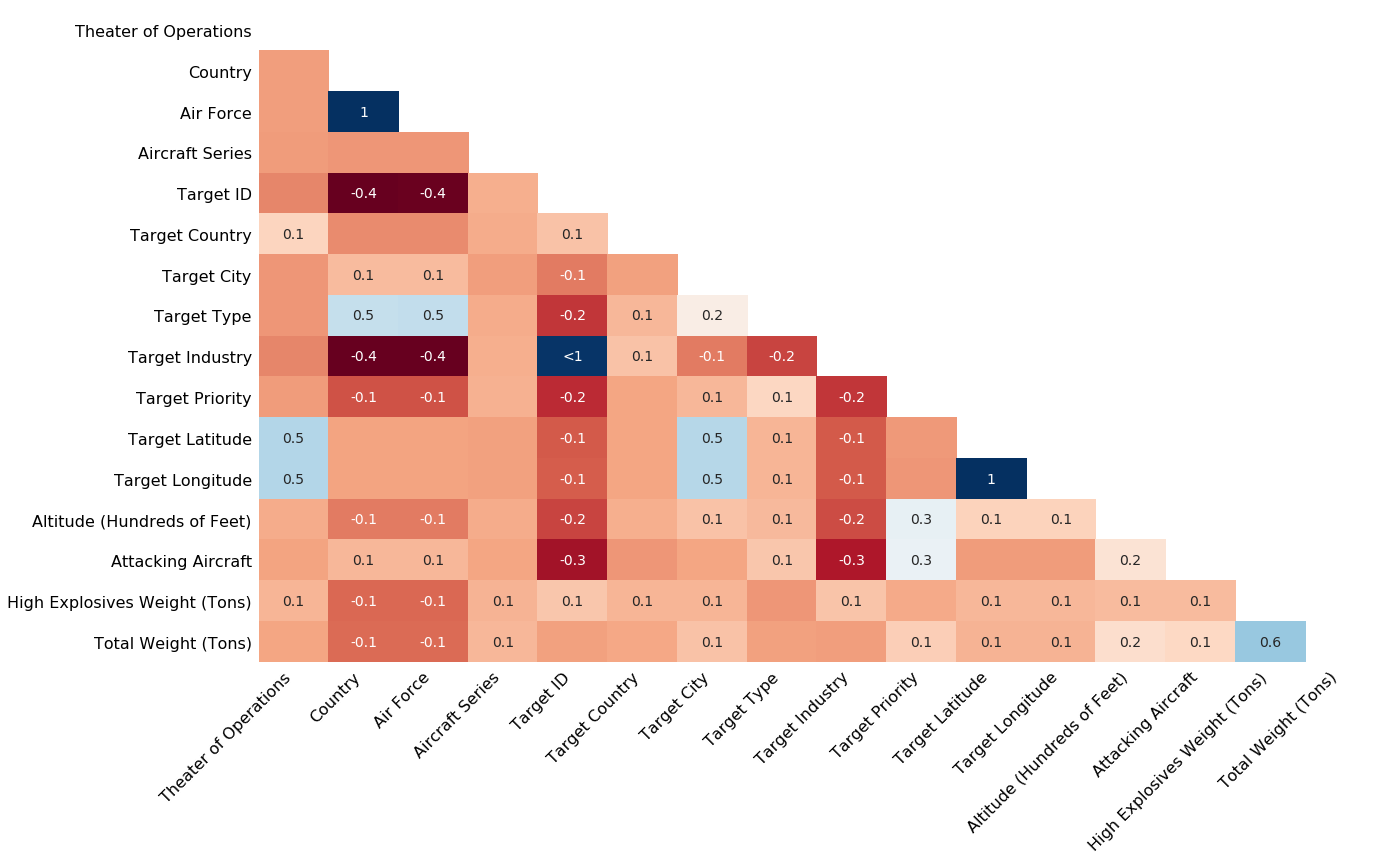

In [425]:
msno.heatmap(observations)

In [429]:
observations['Theater of Operations'].unique()

array(['MTO', 'PTO', 'CBI', 'ETO', nan, 'EAST AFRICA', 'MADAGASCAR'],
      dtype=object)

In [432]:
observations[['Theater of Operations', 'Country']].head()

,Theater of Operations,Country
0,MTO,USA
1,PTO,USA
2,MTO,USA
3,MTO,USA
4,PTO,USA


In [436]:
observations.groupby(['Country', 'Theater of Operations'])['Theater of Operations'].count()

Country        Theater of Operations
AUSTRALIA      PTO                        312
GREAT BRITAIN  CBI                        906
               EAST AFRICA                133
               ETO                      27929
               MADAGASCAR                  26
               MTO                       1416
NEW ZEALAND    PTO                        633
SOUTH AFRICA   EAST AFRICA                  3
               MTO                         16
USA            CBI                      11498
               EAST AFRICA                  4
               ETO                      23622
               MTO                      22511
               PTO                      35247
Name: Theater of Operations, dtype: int64

In [441]:
observations = observations[pd.isnull(observations.Country)==False]
observations = observations[pd.isnull(observations['Altitude (Hundreds of Feet)'])==False]

### Top 10 Highest targeted country 

In [447]:
HighTargetCountry =observations.groupby(['Target Country'])['Target City'].count()

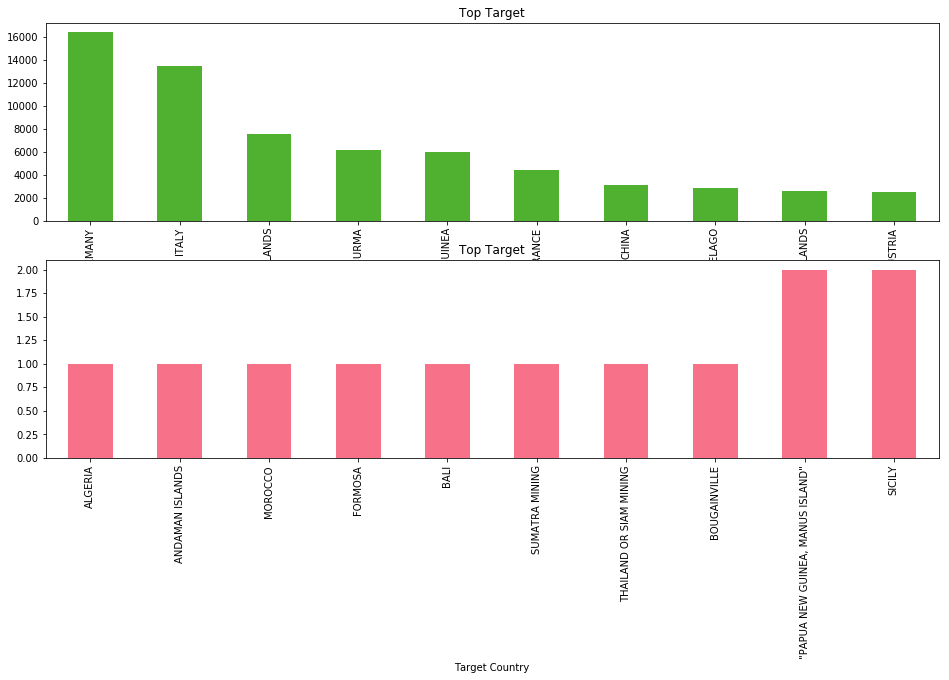

In [457]:
f, ax = pltSize(2,1)
HighTargetCountry.sort_values(ascending=False)[:10].plot(kind='bar', color=BCMP[2], title='Top Target'
                                                        ,ax=ax[0])

HighTargetCountry.sort_values()[:10].plot(kind='bar', color=BCMP[0], title='Top Target'
                                                        ,ax=ax[1])

In [458]:
observations.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons)
1,2,8/15/1943,PTO,USA,5 AF,B24,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,6.0,20.0,20.0
4,5,8/15/1943,PTO,USA,5 AF,B24,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,6.0,8.0,8.0
5,6,8/15/1943,PTO,USA,5 AF,B24,NaN,NEW GUINEA,KDMIATUM,UNIDENTIFIED TARGET,NaN,1,-7.166667,147.000000,35.0,6.0,4.0,4.0
6,7,8/15/1943,PTO,USA,5 AF,B24,NaN,NEW GUINEA,SALAMAUA,UNIDENTIFIED TARGET,NaN,1,-7.016667,147.116667,70.0,1.0,1.0,1.0
7,8,8/15/1943,PTO,USA,5 AF,B17,NaN,NEW GUINEA,SALAMAUA,AIRDROME,NaN,1,-7.016667,147.116667,40.0,8.0,2.0,2.0


### Most used Aircraft Type

In [459]:
aircraft = observations.groupby('Aircraft Series')['Mission ID'].count()

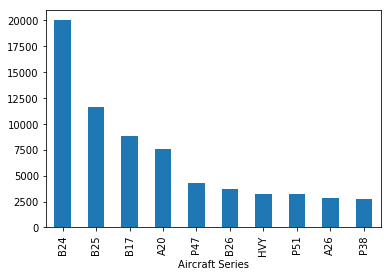

In [461]:
aircraft.sort_values(ascending=False)[:10].plot(kind='bar')

In [463]:
observations['Color'] = ""

In [464]:
import geopandas as gpd 

In [467]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [468]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


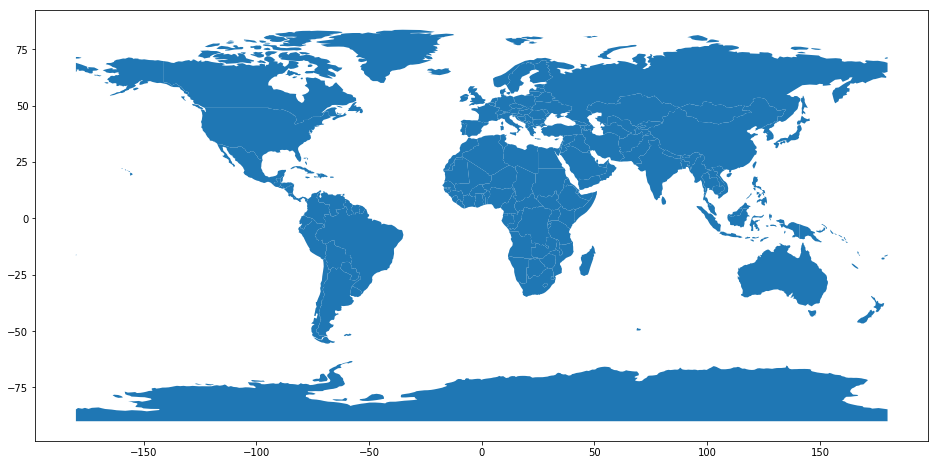

In [483]:
f, ax = pltSize(1,1)
ax.set_aspect('equal')
world.plot(ax=ax)

In [473]:
observations.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Aircraft Series', 'Target ID', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'High Explosives Weight (Tons)',
       'Total Weight (Tons)', 'Color'],
      dtype='object')

In [475]:
coldict = {'Mission ID': 'mid', 'Mission Date': 'Date', 'Theater of Operations':'too',
           'Country':'Country', 'Air Force':'AirForce', 'Aircraft Series':'Aircraft', 'Target ID':'TargetId'
           ,'Target Country': 'TargetCountry',
       'Target City' :'Tcity', 'Target Type':'TType', 'Target Industry':'Tindustry', 
           'Target Priority':'Tpriority',
       'Target Latitude': 'TLatitude', 'Target Longitude':'TLongitude', 
        'Altitude (Hundreds of Feet)':'Altitude',
       'Attacking Aircraft': 'AttackAircraft', 'High Explosives Weight (Tons)':'HEW',
       'Total Weight (Tons)':'TotalWeight', 'Color':'Color'}

In [480]:
observations.rename(columns=coldict,inplace=True)

In [481]:
print(nullpct(observations))

mid                0.000000
Date               0.000000
too                1.526856
Country            0.000000
AirForce           0.027717
Aircraft           0.002410
TargetCountry      0.266326
Tcity              0.050614
TType              2.196888
Tpriority         13.491040
TLatitude          2.850050
TLongitude         2.874152
Altitude           0.000000
AttackAircraft    20.119063
HEW               18.653668
TotalWeight        4.701076
Color              0.000000
dtype: float64


In [478]:
observations.drop(['Target ID','Target Industry'], axis=1, inplace=True)

In [482]:
observations.head()

,mid,Date,too,Country,AirForce,Aircraft,TargetCountry,Tcity,TType,Tpriority,TLatitude,TLongitude,Altitude,AttackAircraft,HEW,TotalWeight,Color
1,2,8/15/1943,PTO,USA,5 AF,B24,NEW GUINEA,KOMIATUM,RIDGE,1,-7.166667,147.000000,44.0,6.0,20.0,20.0,
4,5,8/15/1943,PTO,USA,5 AF,B24,SUMATRA,KILA,VILLAGE,1,-1.116667,103.883333,60.0,6.0,8.0,8.0,
5,6,8/15/1943,PTO,USA,5 AF,B24,NEW GUINEA,KDMIATUM,UNIDENTIFIED TARGET,1,-7.166667,147.000000,35.0,6.0,4.0,4.0,
6,7,8/15/1943,PTO,USA,5 AF,B24,NEW GUINEA,SALAMAUA,UNIDENTIFIED TARGET,1,-7.016667,147.116667,70.0,1.0,1.0,1.0,
7,8,8/15/1943,PTO,USA,5 AF,B17,NEW GUINEA,SALAMAUA,AIRDROME,1,-7.016667,147.116667,40.0,8.0,2.0,2.0,
